In [154]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv"
df = pd.read_csv(url)

In [155]:
df = df[['tweet', 'label']]
df.columns = ['text', 'sentiment']

In [156]:
print("Sentiment categories before processing:", df['sentiment'].unique())

Sentiment categories before processing: [0 1]


In [157]:
if 0 in df['sentiment'].values and 4 in df['sentiment'].values:
    df = df[df['sentiment'].isin([0, 4])].copy()
else:
    print("Notice: Sentiment values 0 and 4 not found, using available unique labels.")
    available_labels = df['sentiment'].unique()
    if len(unique_sentiments) >= 2:
        df = df[df['sentiment'].isin(unique_sentiments[:2])].copy()

Notice: Sentiment values 0 and 4 not found, using available unique labels.


In [158]:
print("class distribution  after filtering:")
print(df['sentiment'].value_counts())

class distribution  after filtering:
sentiment
0    29720
1     2242
Name: count, dtype: int64


In [159]:
df.dropna(inplace=True)

In [160]:
classes = sorted(df['sentiment'].unique())
if len(classes) >= 2:
    label_map = {classes[0]: 0, classes[1]: 1}
    df['sentiment'] = df['sentiment'].map(label_map)

In [161]:
print("Class distribution after mapping:")
print(df['sentiment'].value_counts())

Class distribution after mapping:
sentiment
0    29720
1     2242
Name: count, dtype: int64



Model Accuracy: 0.9485


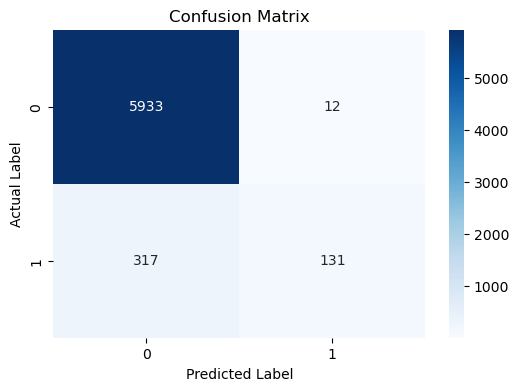

In [162]:
if len(df['sentiment'].unique()) < 2:
    print("Dataset contains only one class after processing, cannot proceed with classification")
else:
    X_train, X_test, y_train, y_test = train_test_split(
        df['text'], df['sentiment'], test_size=0.2, stratify=df['sentiment'], random_state=42)
    vectoriser = TfidfVectorizer(stop_words='english', max_df=0.7)
    X_train_vect = vectoriser.fit_transform(X_train)
    X_test_vect = vectoriser.transform(X_test)

    #Train Logistic Regression Model
    classifier = LogisticRegression(max_iter=200)
    classifier.fit(X_train_tfidf, y_train)

    # Make Predictions
    y_pred = classifier.predict(X_test_tfidf)

    #Evaluate Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"\nModel Accuracy: {accuracy:.4f}")

    #Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

In [163]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


Classification Report:
              precision    recall  f1-score   support

    Negative       0.95      1.00      0.97      5945
    Positive       0.92      0.29      0.44       448

    accuracy                           0.95      6393
   macro avg       0.93      0.65      0.71      6393
weighted avg       0.95      0.95      0.94      6393

